# Black Hole Binary Formation Channels (Gaussian Mixtures)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

- Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

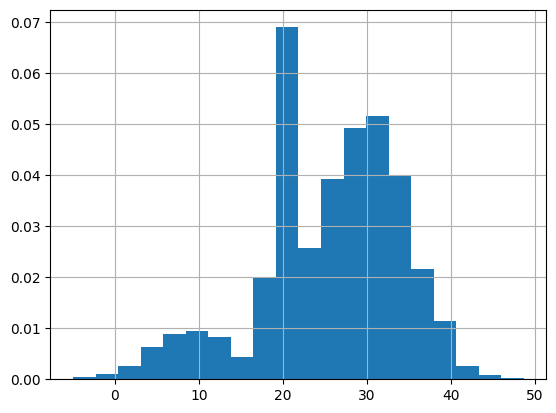

In [2]:
data = np.load('../solutions/formationchannels.npy')

plt.hist(data, bins = 'fd', density=True) 
plt.grid()

Data seems to be following a multimode distribution, having 3 local maxima.
In the following sections, the distribution woud be fit with Gaussian Mixtures model.

A Gaussian Mixture model assumes that data points are generated according to a mixture of gaussians with unknown parameters. The number of Gaussians that best represent the distribution is a parameter of the model that can be contrained performing a model comparison. 

Usually, for equal number of parameters, it could be sufficient to analyse the ones that maximise the likelihood, therefore minimising the chi squared.

Since the number of parameters depends on the number of gaussians used in the model, in order to evaluate the models the Akaike Information Criterion and Bayesian Information Criterion would be used. 
Both methods account for the number of parameters used in the model, favouring the model having less parameters for models fitting data equally well.

The AIC is computed as follows: 
$$ \mathrm{AIC}_M \equiv -2\ln[L^0(M)] + 2k + \frac{2k(k+1)}{N-k-1}, $$
where N is the number of data points, k is the number of parameters

The BIC is: 
$${\rm BIC} \equiv -2 \ln [L_0(M)] + k \ln N.$$ 



- Complete the fit 10 times with $N=1,...,10$ Gaussians. 

- For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

[ 1  2  3  4  5  6  7  8  9 10] [20945.972608590197, 20753.41195568149, 20083.07894669639, 20101.60043333141, 20112.790646690537, 20121.25331490203, 20131.676726829442, 20134.710249943553, 20134.494140972434, 20150.196301912496] [20957.951729488865, 20783.35975792816, 20130.995430291063, 20167.48559827408, 20196.64449298121, 20223.075842540708, 20251.46793581612, 20272.470140278234, 20290.222712655115, 20323.893554943177]


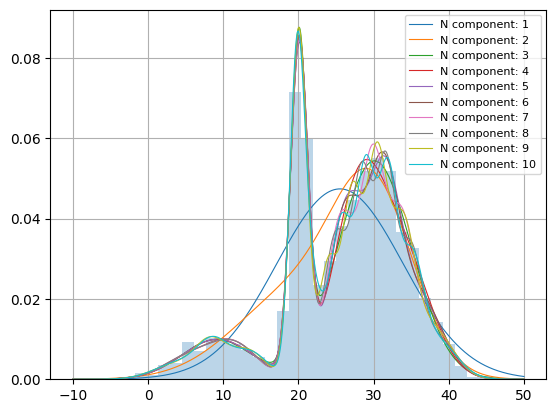

In [12]:
aic = []
bic = []
n_comp = np.arange(1,11, 1)
for i in n_comp:
    gauss_mixtures = GaussianMixture(n_components=i).fit(data)
    xx = np.linspace(-10,50,1000)
    log_likelihood = gauss_mixtures.score_samples(xx.reshape(-1,1))
    likelihood = np.exp(log_likelihood)

    plt.plot(xx, likelihood, label = 'N component: {}'.format(i), linewidth = 0.8)
    aic.append(gauss_mixtures.aic(data))
    bic.append(gauss_mixtures.bic(data))

print(n_comp, aic, bic)

plt.hist(data, bins = 'fd', density=True, alpha = 0.3) 
plt.legend(prop={'size':8})
plt.grid()
plt.show()


Text(0, 0.5, 'Criterion')

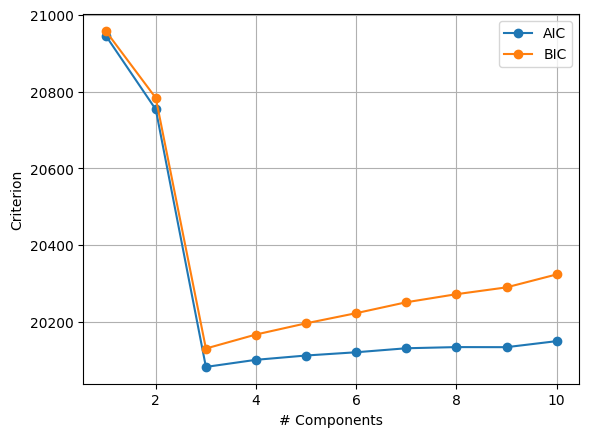

In [22]:
plt.plot(n_comp, aic, marker = 'o',label = 'AIC')
plt.plot(n_comp, bic, label = 'BIC', marker = 'o')
plt.grid()
plt.legend()
plt.xlabel('# Components')
plt.ylabel('Criterion')

- Plot the preferred solution on top of the input data. You should get a very nice fit!

In [17]:

ind = np.where(aic == min(aic))
best_n = n_comp[ind][0] 
print(best_n)

xx = np.linspace(-10,50,1000)
log_likelihood = GaussianMixture(n_components=best_n).fit(data).score_samples(xx.reshape(-1,1)) #score_sample = log likelihood by best fit model params
likelihood = np.exp(log_likelihood)


3


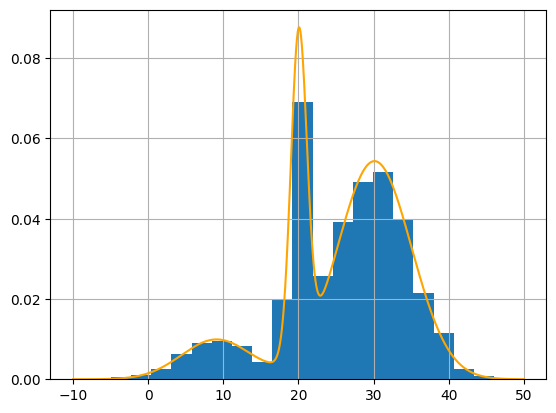

In [18]:
plt.hist(data, bins = 20, density=True) 
plt.plot(xx, likelihood, color='orange') 
plt.grid()



- Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1000, 3)


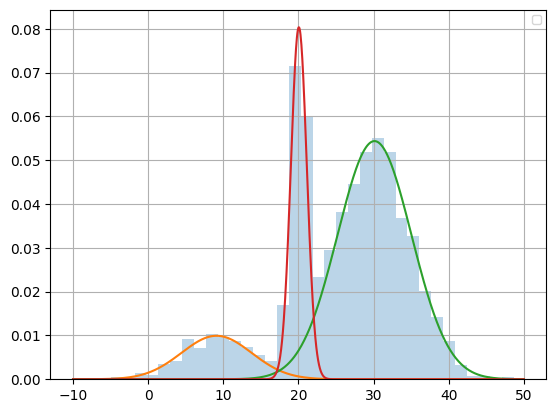

In [21]:
plt.hist(data, bins = 'fd', density=True, alpha = 0.3) 

ncomp_density = GaussianMixture(n_components=best_n).fit(data).predict_proba(xx.reshape(-1,1)) #pdf of the single components
individual_pdf = ncomp_density*likelihood[:,np.newaxis]
print(individual_pdf.shape)
for i in range(best_n): 
    plt.plot(xx, individual_pdf[:,i])

plt.legend(prop={'size':8})
plt.grid()